# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
data_path = "../../data/txt/"

## Choisir une décennie

In [12]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [16]:
files = [
    f for f in sorted(os.listdir(data_path)) 
    if f"_{DECADE[:-1]}" in f
    and not (f.startswith("corpus") or f.startswith("entities"))
    ]

In [17]:
# Exemple de fichiers
files[:5]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt']

In [18]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [48]:
# Exemple de textes
texts[0][:400]

'/ LE SOIR Une importante manifestation franco-belge Le Comité franco-belge du Commerce, de l’Industrie et de l’Agriculture qui. au cours de l’année écoulée et dans les circonstances les plus difficiles a rendu aux relations économiques entre les deux pays des services considérables, donnera le 12 janvier, à 19 h. 30, un dîner à l’occasion de l’anniversaire de son installation. Ce comité, qui fonct'

## Vectoriser les documents à l'aide de TF-IDF

In [20]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [21]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [22]:
import nltk

# Télécharge le nécessaire (mets-en plus si tu fais du lemmatising/stopwords)
for res in ["punkt", "punkt_tab", "stopwords", "wordnet", "omw-1.4"]:
    try:
        nltk.data.find(f"tokenizers/{res}") if "punkt" in res else nltk.data.find(f"corpora/{res}")
    except LookupError:
        nltk.download(res)

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\tommy\TAC2\TAC\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
# Détail de la matrice
tfidf_vectors

<1002x3003 sparse matrix of type '<class 'numpy.float64'>'
	with 595680 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [25]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.430093
ecrire        0.290835
agence        0.287514
bilingue      0.195432
importante    0.172465
                ...   
entreprise    0.000000
entrer        0.000000
entretien     0.000000
env           0.000000
♦             0.000000
Length: 3003, dtype: float64

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [69]:
N_CLUSTERS = 7

### Instancier le modèle K-Means et ses arguments

In [70]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [71]:
clusters = km_model.fit_predict(tfidf_vectors)

In [72]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [73]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-03-06_01-00004.txt',
     'KB_JB838_1960-04-05_01-00004.txt',
     'KB_JB838_1960-05-19_01-00004.txt',
     'KB_JB838_1960-07-05_01-00004.txt',
     'KB_JB838_1960-07-26_01-00004.txt',
     'KB_JB838_1960-10-18_01-00004.txt',
     'KB_JB838_1960-11-05_01-00004.txt',
     'KB_JB838_1960-12-02_01-00004.txt',
     'KB_JB838_1961-02-25_01-00004.txt',
     'KB_JB838_1961-07-16_01-00004.txt',
     'KB_JB838_1961-10-27_01-00004.txt',
     'KB_JB838_1961-12-28_01-00004.txt',
     'KB_JB838_1962-11-15_01-00004.txt',
     'KB_JB838_1963-04-26_01-00004.txt',
     'KB_JB838_1963-11-05_01-00004.txt',
     'KB_JB838_1963-12-28_01-00004.txt',
     'KB_JB838_1964-05-08_01-00004.txt',
     'KB_JB838_1964-06-06_01-00004.txt',
     'KB_JB838_1964-06-13_01-00004.txt',
     'KB_JB838_1964-06-21_01-00004.txt',
     'KB_JB838_1964-08-29_01-00004.txt',
     'KB_JB838_1964-12-01_01-00004.txt',
     'KB_JB838_1964-12-03_01-00004.txt',
     'KB_JB838_1965-03-05_01-00004.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [74]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [75]:
reduced_vectors[:10]

array([[ 0.49905292, -0.43966486],
       [-0.22921093,  0.00140207],
       [-0.27964606, -0.01567158],
       [ 0.28592205,  0.51650276],
       [ 0.30668317,  0.5182246 ],
       [-0.2892697 , -0.08992521],
       [-0.04818861,  0.04052873],
       [-0.06130125,  0.11935147],
       [-0.22374319, -0.05237115],
       [-0.12232285,  0.07450167]])

### Générer le plot

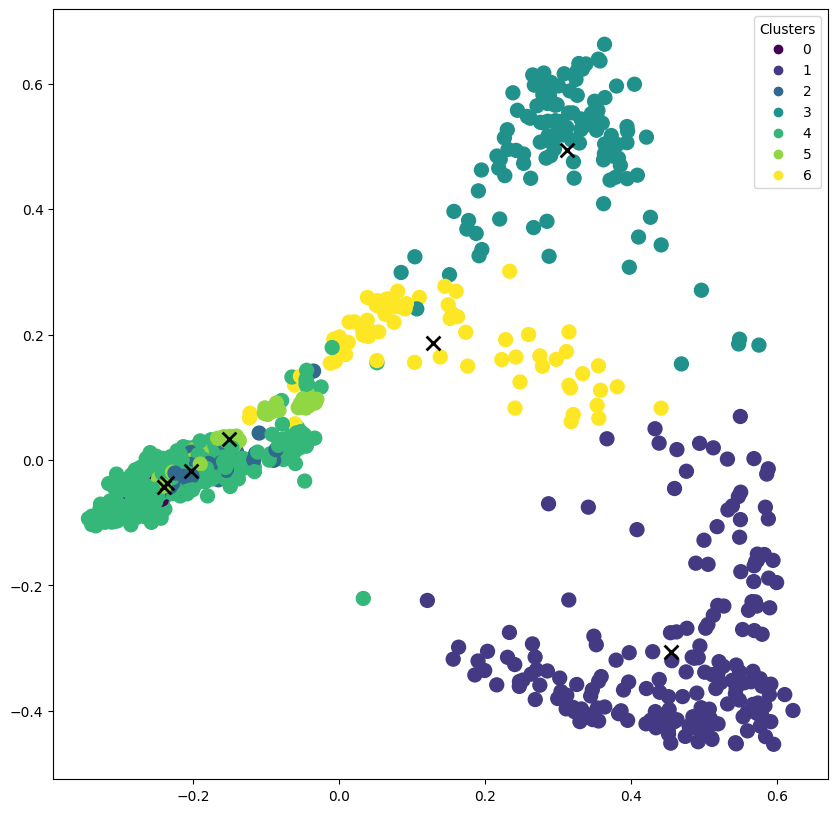

In [76]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")